In [1]:
# make data
import sklearn
from sklearn.datasets import make_circles

In [2]:
n_samples=1000
X,y = make_circles(n_samples, noise = 0.03, random_state=42)

In [120]:
''' not by me '''
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

In [4]:
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0], "X2":X[:,1], "label":y})

In [5]:
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


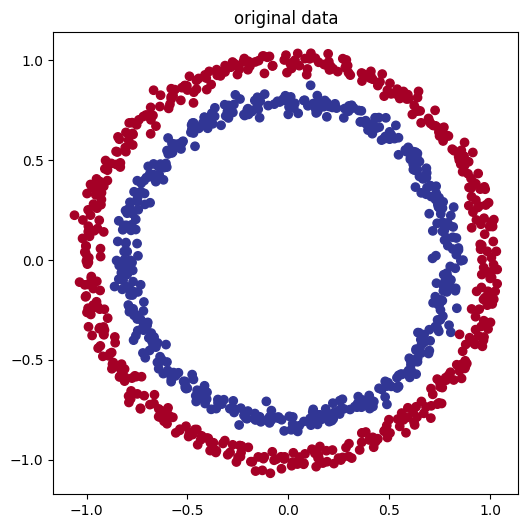

In [267]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.title("original data")
plt.scatter(X[:,0],X[:,1],c=y,cmap='RdYlBu')

In [7]:
import torch

In [8]:
# we convert to torch.float since default dtype in torch is float 32 but it is float 64 for numpy
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [9]:
y = y.unsqueeze(1)
y.shape

torch.Size([1000, 1])

In [10]:
print(X.dtype)
type(X), X.shape, y.shape

torch.float32


(torch.Tensor, torch.Size([1000, 2]), torch.Size([1000, 1]))

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [12]:
for j in [X_train, X_test, y_train, y_test]:
    print(len(j),end=' ')

800 200 800 200 

In [13]:
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [14]:
y_train.shape

torch.Size([800, 1])

In [41]:
# method 1
class CircleModel(nn.Module):
    def __init__(self,X,y , seed = 42): 
        
        super().__init__()
        torch.manual_seed(seed)
        k = 5
        self.l1 = nn.Linear(X.shape[1], k)
        self.l2 = nn.Linear(k , y.shape[1])

    def forward(self,X):
        out1=self.l1(X)
        return self.l2(out1)

    def params(self, digits = 3):
        try:
            return list(map(lambda x : round(x.item(),digits), list(self.parameters())))
        except:
            return  list(self.parameters())

m1 = CircleModel(X,y, seed = 42)
list(m1.parameters())


[Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188]], requires_grad=True),
 Parameter containing:
 tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], requires_grad=True),
 Parameter containing:
 tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], requires_grad=True),
 Parameter containing:
 tensor([-0.2060], requires_grad=True)]

In [34]:
# method 2 

torch.manual_seed(42)
k = 5
m2 = nn.Sequential(
    
        nn.Linear(X.shape[1], k),
        nn.Linear(k , y.shape[1])
)
list(m2.parameters())

# m1

[Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188]], requires_grad=True),
 Parameter containing:
 tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], requires_grad=True),
 Parameter containing:
 tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], requires_grad=True),
 Parameter containing:
 tensor([-0.2060], requires_grad=True)]

In [241]:
# method 3 : hybrid:
class CircleModel3(nn.Module):
    def __init__(self,X,y , seed = 42): 
        
        super().__init__()
        torch.manual_seed(seed)
        k = 5
        self.l1 = nn.Linear(X.shape[1], k)
        self.l2 = nn.Linear(k , y.shape[1])

        self.two_layers = nn.Sequential(
    
            nn.Linear(X.shape[1], k),
            nn.Linear(k , y.shape[1])
        )

    def forward(self,X):
        # out1=self.l1(X)
        # return self.l2(out1)
        return self.two_layers(X)

    def params(self, digits = 3):
        try:
            return list(map(lambda x : round(x.item(),digits), list(self.parameters())))
        except:
            return  list(self.parameters())

m3 = CircleModel3(X,y, seed = 42)
# list(m1.parameters())



In [149]:
# method 4 experimentation
class CircleModel4(nn.Module):
    def __init__(self,X,y , seed = 42): 
        
        super().__init__()
        torch.manual_seed(seed)
        k = 8
        k1 = 16
        self.l1 = nn.Linear(X.shape[1], k)
        self.l1 = nn.Linear(X.shape[1], k)
        self.l2 = nn.Linear(k , y.shape[1])

    def forward(self,X):
        out1=self.l1(X)
        return self.l2(out1)

    def params(self, digits = 3):
        try:
            return list(map(lambda x : round(x.item(),digits), list(self.parameters())))
        except:
            return  list(self.parameters())

m4 = CircleModel4(X,y, seed = 42)
list(m4.parameters())


[Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188],
         [ 0.6146,  0.1323],
         [ 0.5224,  0.0958],
         [ 0.3410, -0.0998]], requires_grad=True),
 Parameter containing:
 tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691],
        requires_grad=True),
 Parameter containing:
 tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003]],
        requires_grad=True),
 Parameter containing:
 tensor([0.2730], requires_grad=True)]

In [21]:
list(m1.parameters())

[Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188]], requires_grad=True),
 Parameter containing:
 tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], requires_grad=True),
 Parameter containing:
 tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], requires_grad=True),
 Parameter containing:
 tensor([-0.2060], requires_grad=True)]

In [43]:
m2.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]])),
             ('0.bias', tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
             ('1.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
             ('1.bias', tensor([-0.2060]))])

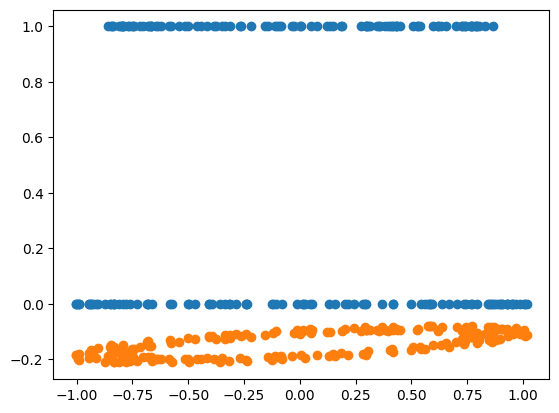

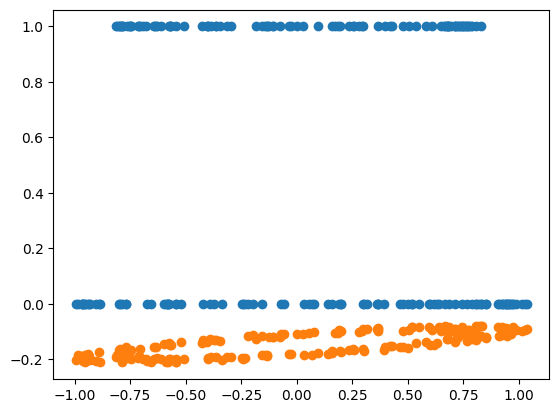

In [92]:
import torch as t
with t.inference_mode():
    untrained_pred = m2(X_test)
    untrained_pred.shape
    # X_test.shape
    plt.scatter(X_test[:,0],y_test)
    plt.scatter(X_test[:,0],untrained_pred)
    plt.show()
    plt.scatter(X_test[:,1],y_test)
    plt.scatter(X_test[:,1],untrained_pred)
    # plt.scatter(X[:,0],X[:,1],c=y,cmap='RdYlBu')

In [61]:
m0 = m2
loss_fn = t.nn.BCEWithLogitsLoss() #inscludes signoimd
# we can use nn.BCELoss if sigmoid already apploed

optimizer = t.optim.SGD(params = m0.parameters(), lr = 0.1)

def accuracy_fn (y,pred):
    correct = t.eq(y,pred).sum().item()
    acc =  (correct / len(pred)) * 100
    return acc

In [183]:
def reset():
    torch.manual_seed(42)
    global m0, optimizer, loss_fn
    m0=CircleModel4(X,y)
    optimizer = t.optim.SGD(params = m0.parameters(), lr = 0.1)

#     k = 8
#     k1= 16
#     m0 = nn.Sequential(
        
#             nn.Linear(X.shape[1], k),
#             nn.Linear( k, k1),
#             nn.Linear( k1, 64),
#             nn.Linear( 64, 128),
#             nn.Linear( 128, k1),
#             nn.Linear(k1 , y.shape[1])
#     )
    
    loss_fn = t.nn.BCEWithLogitsLoss() 
    optimizer = t.optim.SGD(params = m0.parameters(),lr=0.01)

In [75]:
loss_f2 = t.nn.BCELoss()
loss_f2

BCELoss()

 Acc: 50.00 %
 Acc: 45.50 %
Decision boundaries with 3 linear layers


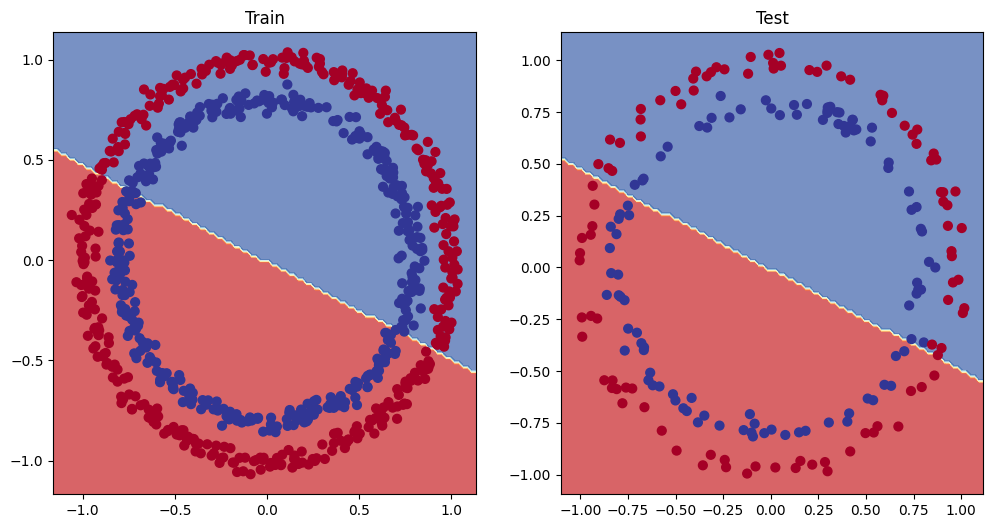

In [272]:
epochs = 400
def reset():
    torch.manual_seed(42)
    global m0, optimizer, loss_fn
    m0=CircleModel(X,y)
    optimizer = t.optim.SGD(params = m0.parameters(), lr = 0.1)
reset()

for epoch in range(epochs):
    m0.train()
    y_logits = m0(X_train)
    y_pred_probs = t.sigmoid(y_logits)
    y_pred = t.round(y_pred_probs)

    # print(pred[:10].T)
    loss = loss_fn(y_logits, y_train)
    loss1 = loss_f2(y_pred_probs, y_train)
    acc = accuracy_fn(y_pred , y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    m0.eval()
    with t.inference_mode():

        test_logits = m0(X_test)
        test_pred_probs = t.sigmoid(test_logits)
        test_pred = t.round(test_pred_probs) 

        test_loss= loss_fn(test_logits, y_test)

        test_acc = accuracy_fn(test_pred , y_test)

        # if epoch%999==0:
        #     print(f"Epoch: {epoch}  | Train Loss : {loss.detach().item():.5f} , Acc: {acc:.2f} % | Test Loss:  {test_loss.detach().item():.5f}  , Acc: {test_acc:.2f} %")

        if epoch%(epochs-1)==0:
            print(f" Acc: {test_acc:.2f} %")


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(m0,X_train,y_train)

plt.subplot(1,2,2)

plt.title("Test")
print("Decision boundaries with 3 linear layers")
plot_decision_boundary(m0,X_test,y_test)


Epoch: 0  | Train Loss : 0.69295 , Acc: 50.00 % | Test Loss:  0.69325  , Acc: 50.00 %
 Acc: 50.00 %
Epoch: 50  | Train Loss : 0.69268 , Acc: 50.00 % | Test Loss:  0.69291  , Acc: 50.00 %
Epoch: 100  | Train Loss : 0.69248 , Acc: 50.38 % | Test Loss:  0.69264  , Acc: 50.00 %
Epoch: 150  | Train Loss : 0.69234 , Acc: 53.87 % | Test Loss:  0.69245  , Acc: 50.50 %
Epoch: 200  | Train Loss : 0.69225 , Acc: 59.00 % | Test Loss:  0.69233  , Acc: 56.00 %
Epoch: 250  | Train Loss : 0.69217 , Acc: 64.12 % | Test Loss:  0.69223  , Acc: 62.00 %
Epoch: 300  | Train Loss : 0.69209 , Acc: 70.12 % | Test Loss:  0.69214  , Acc: 67.00 %
Epoch: 350  | Train Loss : 0.69202 , Acc: 71.00 % | Test Loss:  0.69205  , Acc: 70.00 %
Epoch: 400  | Train Loss : 0.69195 , Acc: 68.38 % | Test Loss:  0.69197  , Acc: 70.00 %
Epoch: 450  | Train Loss : 0.69188 , Acc: 63.75 % | Test Loss:  0.69188  , Acc: 69.00 %
Epoch: 500  | Train Loss : 0.69181 , Acc: 58.50 % | Test Loss:  0.69179  , Acc: 62.00 %
Epoch: 550  | Train L

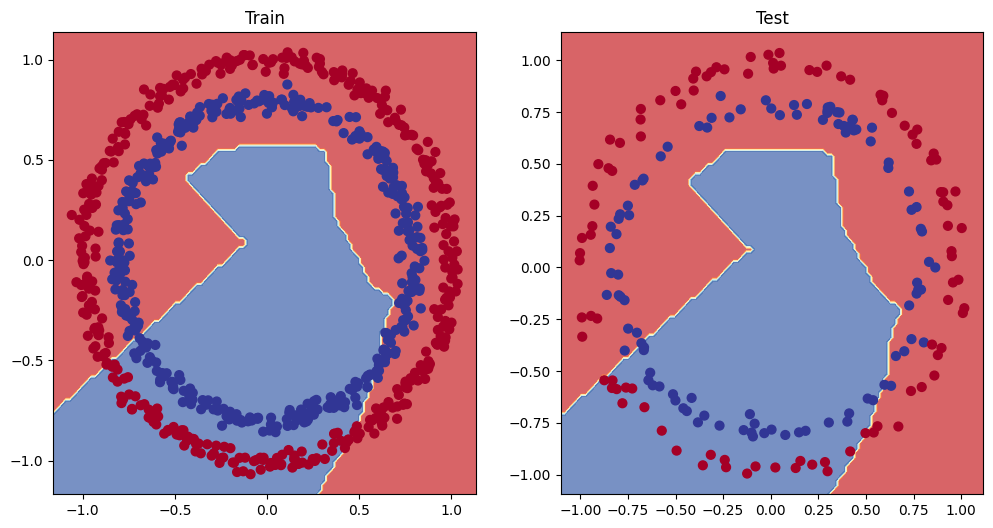

In [270]:
# non linear
class CircleModelV2(nn.Module):
    def __init__(self,X,y , seed = 42, k = 10): 
        
        super().__init__()
        torch.manual_seed(seed)
        # k = 10
        # k1 = 16
        self.l1 = nn.Linear(X.shape[1], k)
        self.l2 = nn.Linear(k, k)
        self.l3 = nn.Linear(k , y.shape[1])
        self.relu=t.nn.ReLU()

    def forward(self,X):
        return self.l3(self.relu(self.l2(self.relu(self.l1(X)))))

m0 = CircleModelV2(X,y)

def reset():
    torch.manual_seed(42)
    global m0, optimizer, loss_fn
    m0=CircleModelV2(X,y, k = 10)
    optimizer = t.optim.SGD(params = m0.parameters(), lr = 0.01)


reset()

for epoch in range(epochs):
    m0.train()
    y_logits = m0(X_train)
    y_pred_probs = t.sigmoid(y_logits)
    y_pred = t.round(y_pred_probs)

    # print(pred[:10].T)
    loss = loss_fn(y_logits, y_train)
    loss1 = loss_f2(y_pred_probs, y_train)
    acc = accuracy_fn(y_pred , y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    m0.eval()
    with t.inference_mode():

        test_logits = m0(X_test)
        test_pred_probs = t.sigmoid(test_logits)
        test_pred = t.round(test_pred_probs) 

        test_loss= loss_fn(test_logits, y_test)

        test_acc = accuracy_fn(test_pred , y_test)

        if epoch%50==0:
            # print(f"Epoch: {epoch}  Acc: {test_acc:.2f} %")
            print(f"Epoch: {epoch}  | Train Loss : {loss.detach().item():.5f} , Acc: {acc:.2f} % | Test Loss:  {test_loss.detach().item():.5f}  , Acc: {test_acc:.2f} %")

        if epoch%(epochs-1)==0:
            print(f" Acc: {test_acc:.2f} %")


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(m0,X_train,y_train)

plt.subplot(1,2,2)

plt.title("Test")
# plt.suptitle("Decision boundaries after adding RELU non linearity")
print("Decision boundaries after adding RELU non linearity")
plot_decision_boundary(m0,X_test,y_test)


In [250]:
epochs

400

Epoch: 0  | Train Loss : 0.69295 , Acc: 50.00 % | Test Loss:  0.69319  , Acc: 50.00 %
 Acc: 50.00 %
Epoch: 50  | Train Loss : 0.69181 , Acc: 58.25 % | Test Loss:  0.69177  , Acc: 58.00 %
Epoch: 100  | Train Loss : 0.69115 , Acc: 52.88 % | Test Loss:  0.69102  , Acc: 52.50 %
Epoch: 150  | Train Loss : 0.69050 , Acc: 52.88 % | Test Loss:  0.69027  , Acc: 55.00 %
Epoch: 200  | Train Loss : 0.68977 , Acc: 53.37 % | Test Loss:  0.68940  , Acc: 55.00 %
Epoch: 250  | Train Loss : 0.68894 , Acc: 53.50 % | Test Loss:  0.68840  , Acc: 56.00 %
Epoch: 300  | Train Loss : 0.68795 , Acc: 53.00 % | Test Loss:  0.68723  , Acc: 56.00 %
Epoch: 350  | Train Loss : 0.68676 , Acc: 52.62 % | Test Loss:  0.68587  , Acc: 56.50 %
Epoch: 400  | Train Loss : 0.68517 , Acc: 52.75 % | Test Loss:  0.68411  , Acc: 56.50 %
Epoch: 450  | Train Loss : 0.68326 , Acc: 52.75 % | Test Loss:  0.68198  , Acc: 56.00 %
Epoch: 500  | Train Loss : 0.68102 , Acc: 52.75 % | Test Loss:  0.67941  , Acc: 56.50 %
Epoch: 550  | Train L

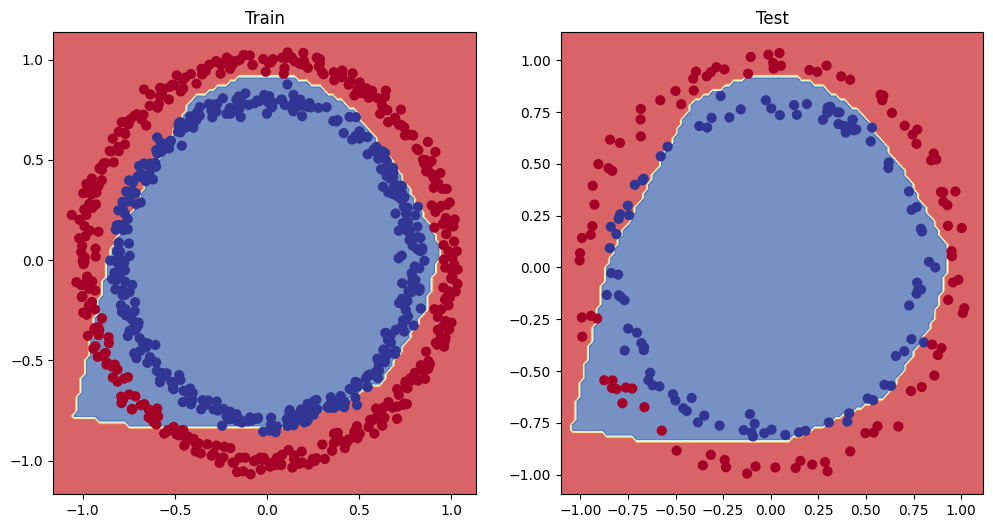

In [271]:
# after tweaking learning rate to 0.1 from 0.01: 
class CircleModelV2(nn.Module):
    def __init__(self,X,y , seed = 42, k = 10): 
        
        super().__init__()
        torch.manual_seed(seed)
        # k = 10
        # k1 = 16
        self.l1 = nn.Linear(X.shape[1], k)
        self.l2 = nn.Linear(k, k)
        self.l3 = nn.Linear(k , y.shape[1])
        self.relu=t.nn.ReLU()

    def forward(self,X):
        return self.l3(self.relu(self.l2(self.relu(self.l1(X)))))


def reset():
    torch.manual_seed(42)
    global m0, optimizer, loss_fn
    m0=CircleModelV2(X,y, k = 10)
    optimizer = t.optim.SGD(params = m0.parameters(), lr = 0.1)

epochs = 1000
reset()

for epoch in range(epochs):
    m0.train()
    y_logits = m0(X_train)
    y_pred_probs = t.sigmoid(y_logits)
    y_pred = t.round(y_pred_probs)

    # print(pred[:10].T)
    loss = loss_fn(y_logits, y_train)
    loss1 = loss_f2(y_pred_probs, y_train)
    acc = accuracy_fn(y_pred , y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    m0.eval()
    with t.inference_mode():

        test_logits = m0(X_test)
        test_pred_probs = t.sigmoid(test_logits)
        test_pred = t.round(test_pred_probs) 

        test_loss= loss_fn(test_logits, y_test)

        test_acc = accuracy_fn(test_pred , y_test)

        if epoch%50==0:
            # print(f"Epoch: {epoch}  Acc: {test_acc:.2f} %")
            print(f"Epoch: {epoch}  | Train Loss : {loss.detach().item():.5f} , Acc: {acc:.2f} % | Test Loss:  {test_loss.detach().item():.5f}  , Acc: {test_acc:.2f} %")

        if epoch%(epochs-1)==0:
            print(f" Acc: {test_acc:.2f} %")


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(m0,X_train,y_train)

plt.subplot(1,2,2)

plt.title("Test")
# plt.suptitle("Decision boundaries after Learning rate = 0.1 from 0.01")
print("Decision boundaries after Learning rate = 0.1 from 0.01")
plot_decision_boundary(m0,X_test,y_test)


Epoch: 0  | Train Loss : 0.69310 , Acc: 50.00 % | Test Loss:  0.69249  , Acc: 50.00 %
 Acc: 50.00 %
Epoch: 50  | Train Loss : 0.69143 , Acc: 57.75 % | Test Loss:  0.69117  , Acc: 58.00 %
Epoch: 100  | Train Loss : 0.69055 , Acc: 59.13 % | Test Loss:  0.69051  , Acc: 64.00 %
Epoch: 150  | Train Loss : 0.68951 , Acc: 59.75 % | Test Loss:  0.68965  , Acc: 64.00 %
Epoch: 200  | Train Loss : 0.68821 , Acc: 58.88 % | Test Loss:  0.68855  , Acc: 60.50 %
Epoch: 250  | Train Loss : 0.68650 , Acc: 62.00 % | Test Loss:  0.68712  , Acc: 62.50 %
Epoch: 300  | Train Loss : 0.68419 , Acc: 64.38 % | Test Loss:  0.68519  , Acc: 65.00 %
Epoch: 350  | Train Loss : 0.68091 , Acc: 66.50 % | Test Loss:  0.68244  , Acc: 66.50 %
Epoch: 400  | Train Loss : 0.67611 , Acc: 67.62 % | Test Loss:  0.67834  , Acc: 67.50 %
Epoch: 450  | Train Loss : 0.66897 , Acc: 68.38 % | Test Loss:  0.67231  , Acc: 67.50 %
Epoch: 500  | Train Loss : 0.65788 , Acc: 72.00 % | Test Loss:  0.66285  , Acc: 71.00 %
Epoch: 550  | Train L

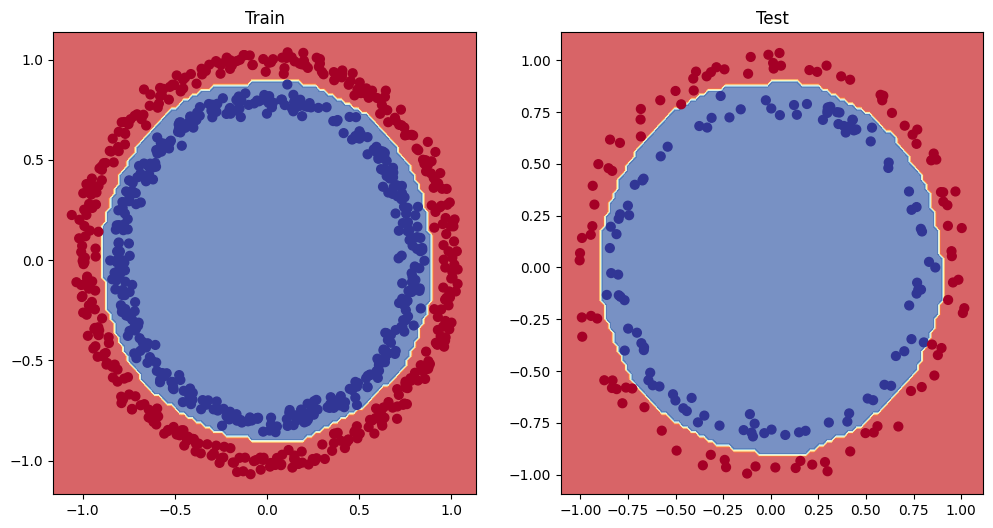

In [277]:
epochs = 1000

# non linear
class CircleModelV2(nn.Module):
    def __init__(self,X,y , seed = 42, k = 10): 
        
        super().__init__()
        torch.manual_seed(seed)
        k = 32
        k1 = 64
        self.l1 = nn.Linear(X.shape[1], k)
        self.l2 = nn.Linear(k, k1)
        self.l3 = nn.Linear(k1 , k)
        self.l4 = nn.Linear(k , y.shape[1])
        self.relu=t.nn.ReLU()

    def forward(self,X):
        return self.l4(self.relu(self.l3(self.relu(self.l2(self.relu(self.l1(X)))))))



def reset():
    torch.manual_seed(42)
    global m0, optimizer, loss_fn
    m0=CircleModelV2(X,y, k = 10)
    optimizer = t.optim.SGD(params = m0.parameters(), lr = 0.1)

reset()

for epoch in range(epochs):
    m0.train()
    y_logits = m0(X_train)
    y_pred_probs = t.sigmoid(y_logits)
    y_pred = t.round(y_pred_probs)

    # print(pred[:10].T)
    loss = loss_fn(y_logits, y_train)
    loss1 = loss_f2(y_pred_probs, y_train)
    acc = accuracy_fn(y_pred , y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    m0.eval()
    with t.inference_mode():

        test_logits = m0(X_test)
        test_pred_probs = t.sigmoid(test_logits)
        test_pred = t.round(test_pred_probs) 

        test_loss= loss_fn(test_logits, y_test)

        test_acc = accuracy_fn(test_pred , y_test)

        if epoch%50==0:
            # print(f"Epoch: {epoch}  Acc: {test_acc:.2f} %")
            print(f"Epoch: {epoch}  | Train Loss : {loss.detach().item():.5f} , Acc: {acc:.2f} % | Test Loss:  {test_loss.detach().item():.5f}  , Acc: {test_acc:.2f} %")

        if epoch%(epochs-1)==0:
            print(f" Acc: {test_acc:.2f} %")



plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(m0,X_train,y_train)

plt.subplot(1,2,2)
print("Decision boundaries after adding layer and upsampling")
plt.title("Test")
plot_decision_boundary(m0,X_test,y_test)


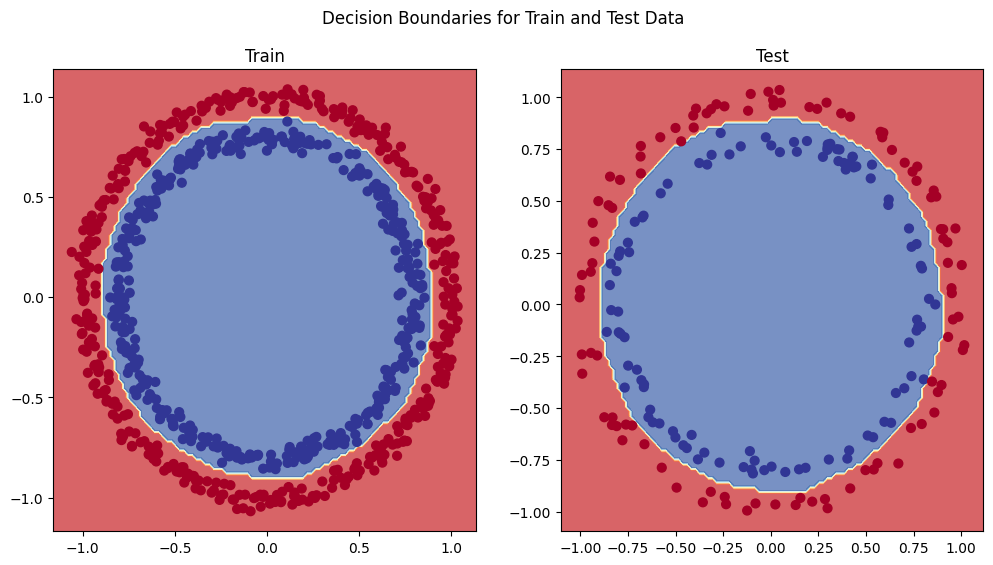

In [256]:

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(m0,X_train,y_train)

plt.subplot(1,2,2)

plt.title("Test")
plt.suptitle("Decision boundaries ")
plot_decision_boundary(m0,X_test,y_test)

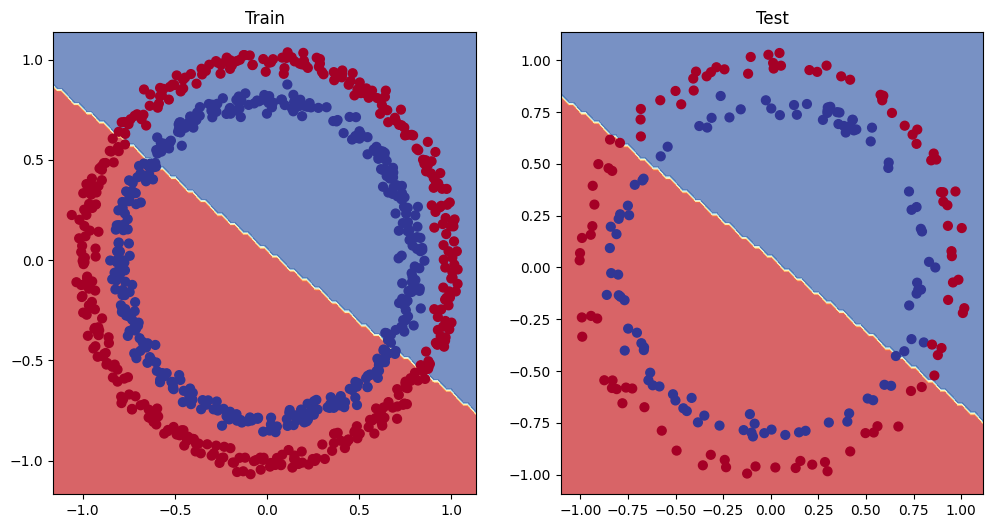

In [142]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(m0,X_train,y_train)

plt.subplot(1,2,2)

plt.title("Test")
plot_decision_boundary(m0,X_test,y_test)